# GIS 프로그래밍 및 실습 Final Project

## 우천용 고휘도 차선 선정

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp
from geopandas import GeoSeries, GeoDataFrame, read_file
from pandas import Series
import matplotlib.font_manager as fm
import matplotlib

###### 16,17년 6~8월 강수량

In [2]:
rain=np.loadtxt('16,17년 6~8월 강수량.txt')
rain=rain[1::3]
rain

array([[1.085e+02, 4.000e+00, 0.000e+00, 2.950e+01, 1.005e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e-01, 1.500e+00, 4.650e+01, 2.500e+00, 2.000e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e-01, 5.000e-01,
        0.000e+00, 0.000e+00, 5.000e-01, 2.000e-01, 5.950e+01, 5.000e-01,
        2.000e-01],
       [5.000e-01, 9.200e+01, 6.750e+01, 5.000e-01, 0.000e+00, 3.400e+01,
        1.650e+01, 4.500e+00, 3.250e+01, 1.445e+02, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.250e+01, 2.250e+01, 7.500e+00, 2.500e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.000e-01, 1.335e+02, 3.000e+00,
        0.000e+00, 0.000e+00, 3.500e+00, 8.500e+00, 0.000e+00, 0.000e+00,
        3.500e+00]])

#### 교통량 많은 지역 선정

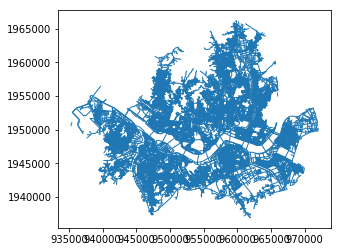

In [3]:
pass_car = pd.read_csv('2016년 07월 서울시 교통량 조사자료.csv', engine='python')
cent_road = gp.read_file('seoul_road_5179.shp')
seoul=cent_road.plot(LineWidth=1)

In [4]:
only_pass = pass_car.values[:,6:]
only_pass = only_pass.astype(float)
oneday_mean = only_pass.sum(axis=1) #하루평균

In [5]:
pass_car['1day'] = oneday_mean / 24 
pass_car = pass_car.drop(pass_car.columns[6:30],axis=1)
pass_car = pass_car[pass_car['구분'] == '유입']
del pass_car['방향']

In [6]:
road_set = set(pass_car['RN'].values[:])  #도로 리스트
road_list = list(road_set)
onemonth_mean = []                          #월별 평균만들기
for x in road_list:
    onemonth_mean.append(np.mean(pass_car[pass_car['RN'] == x].values[:,-1]))

In [7]:
d = {'RN': road_list , 'onemonth_mean': onemonth_mean}  #도로 + 월평균 데이터프레임 만들기
df = pd.DataFrame(data=d)

In [8]:
df_sort = df.sort_values(by=['onemonth_mean'])
top6 = df_sort.tail(20)
c = pd.merge(top6,cent_road, on = 'RN')  #중심선 + 도로별 월평균

In [9]:
c6_set = set(c['RN'].values[:])
c6_list = list(c6_set)

In [10]:
c6_d = {'RN': c6_list}
c6_df = pd.DataFrame(data=c6_d)
c6 = pd.merge(c6_df,df, on = 'RN')
c6_gis = pd.merge(c6,cent_road, on = 'RN')

In [11]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list)) 
font_list
font_list = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/LG PC.ttf").get_name()
matplotlib.rc('font', family=font_name)

705
174


Text(0,0.5,'onemonth_mean')

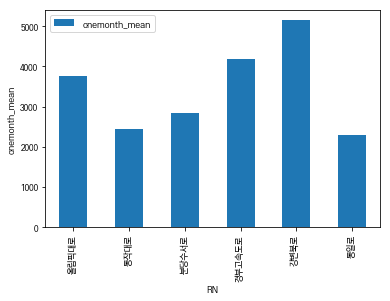

In [12]:
my_plot = c6.plot(c6['RN'],kind = 'bar')
my_plot.set_xlabel('RN')
my_plot.set_ylabel('onemonth_mean')

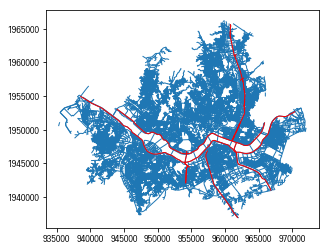

In [13]:
from geopandas import GeoDataFrame

geometry = c['geometry'].values[:]
c = c.drop(['geometry'], axis=1)
crs = {'init': 'epsg:5179'}
cent_road = gp.read_file('seoul_road_5179.shp')
seoul=cent_road.plot(LineWidth=1)
gcc = GeoDataFrame(c, crs=crs, geometry=geometry)
gcc.plot(ax=seoul, LineWidth=1,color='r')

In [14]:
import folium
m=folium.Map(location=[37.566345,126.977893], zoom_start=11, tiles='Stamen Toner', crs="EPSG3857")
folium.GeoJson(gcc).add_to(m)
m

#### 우천시 교통사고 다발지역 선정

In [15]:
acc=pd.read_excel('2016년 서울시 6월~8월 비 교통사고.xlsx', index_col=None)

In [16]:
acc_list=list(acc['RN'].values[:])
acc_dic={}
for rn in acc_list:
    try: acc_dic[rn]+=1
    except: acc_dic[rn]=1
print (acc_dic)

{'학동로': 2, '영동대로': 8, '강남대로': 14, '논현로': 15, '압구정로': 4, '테헤란로': 11, '언주로': 7, '봉은사로': 7, '양재대로': 10, '선릉로': 6, '도곡로': 3, '삼성로': 2, '도산대로': 3, '남부순환로': 15, '밤고개로': 1, '개포로': 1, '송파대로': 4, '역삼로': 1, '광평로': 1, '상암로': 3, '동남로': 1, '성내로': 1, '천중로': 2, '고덕로': 3, '올림픽로': 9, '풍성로': 1, '아리수로': 2, '천호대로': 10, '구천면로': 2, '강변북로': 11, '상일로': 1, '도봉로': 10, '삼양로': 10, '인수봉로': 2, '솔매로': 1, '4.19로': 1, '삼각산로': 1, '오패산로': 4, '한천로': 8, '솔샘로': 2, '오현로': 2, '덕릉로': 12, '노해로': 10, '강서로': 5, '공항대로': 3, '월정로': 3, '방화대로': 1, '양천로': 1, '화곡로': 3, '올림픽대로': 2, '벌말로': 1, '개화동로': 1, '난곡로': 1, '양녕로': 2, '신림로': 3, '조원로': 1, '봉천로': 3, '시흥대로': 6, '호암로': 2, '관악로': 2, '은천로': 1, '쑥고개로': 1, '과천대로': 5, '아차산로': 4, '광장로': 1, '동일로': 15, '용마산로': 5, '광나루로': 3, '답십리로': 4, '자양로': 1, '강변역로': 2, '능동로': 1, '군자로': 1, '경인로': 9, '신정로': 2, '도림로': 4, '디지털로': 8, '구로동로': 3, '구로중앙로': 2, '오리로': 1, '가마산로': 4, '서부간선도로': 2, '안양천로': 3, '구일로': 1, '중앙로': 4, '고척로': 2, '탑골로': 1, '범안로': 1, '가산로': 2, '독산로': 1, '금하로': 1, '중계로': 3, '한글비석로': 5, '노원로': 5, '화

In [17]:
acc_set=list(acc_dic.keys())
acc_count=[acc_dic.get(rn) for rn in acc_set]
acc_dic = {'RN': acc_set , 'count': acc_count}
acc_df = pd.DataFrame(data=acc_dic)
acc=acc.drop(acc.index[1:500],axis=0)
acc=acc.drop(acc.columns[:18],axis=1)
acc['RN']=acc_set
acc['count']=acc_count

In [18]:
acc_df_sort = acc_df.sort_values(by=['count'])
acc_df_sort

,RN,count
142,외우산로,1
104,경희대로,1
190,장월로,1
191,동소문로,1
193,길음로,1
98,이문로,1
97,광운로,1
96,월계로,1
95,동이로,1
196,국제금융로,1


In [19]:
acc_top6= acc_df_sort.tail(6)
acc_geo = pd.merge(acc_top6,cent_road, on = 'RN')
acc_geo

,RN,count,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,...,RDS_DPN_SE,RDS_MAN_NO,REP_CN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
0,강변북로,11,20090701,한강의 북쪽 도로를 뜻함,20,Gangbyeonbuk-ro,20160712,도로선형 위치정확도 개선사업에 의한 도로구간 변경,71,20090710,...,0,3508,마포동 420,3196001,27.0,27950.0,3,11440,2,LINESTRING (943960.0249430384 1953060.22556882...
1,강변북로,11,20090701,한강의 북쪽 도로를 뜻함,20,Gangbyeonbuk-ro,20160614,16년 도로명주소 DB 정비계획에 따른 오류정비 및 DB반영,71,20090710,...,0,2464,성수동2가 158-4,3196001,50.0,27950.0,3,11200,2,LINESTRING (957318.6536087431 1948832.47600669...
2,강변북로,11,20090701,한강의 북쪽 도로를 뜻함,20,Gangbyeonbuk-ro,20160614,직권수정(속성변경),99,20090710,...,0,3189,한남동 785-0,3196001,50.0,27950.0,3,11170,2,LINESTRING (950955.970106245 1948487.023378996...
3,강변북로,11,20090701,한강의 북쪽 도로를 뜻함,20,Gangbyeonbuk-ro,20160621,도로선형 위치정확도 개선사업에 의한 도로구간 변경,71,20090710,...,0,2935,광진구 광장동 594(광장동 시계),3196001,20.0,27950.0,3,11215,2,LINESTRING (961041.8805981167 1948325.74807487...
4,덕릉로,12,20091008,인근에 덕흥대원군의 묘가 위치함,10,Deongneung-ro,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090710,...,1,1794,번동 655-7,3000004,2.0,11419.0,3,11305,1,LINESTRING (958498.160792653 1959622.474997006...
5,덕릉로,12,20091008,인근에 덕흥대원군의 묘가 위치함,10,Deongneung-ro,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090710,...,1,1795,번동 655-7,3000004,9.0,11419.0,3,11305,1,LINESTRING (957363.1771010695 1959515.88666528...
6,덕릉로,12,20091008,인근에 덕흥대원군의 묘가 위치함,10,Deongneung-ro,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090710,...,1,1796,번동 655-7,3000004,3.0,11419.0,3,11305,1,LINESTRING (958557.6655810295 1959627.55385527...
7,덕릉로,12,20091008,인근에 덕흥대원군의 묘가 위치함,10,Deongneung-ro,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090710,...,1,2293,번동 655-7,3000004,2.0,11419.0,3,11305,1,LINESTRING (958768.7192970653 1959644.95868103...
8,덕릉로,12,20091008,인근에 덕흥대원군의 묘가 위치함,10,Deongneung-ro,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090710,...,1,2295,번동 655-7,3000004,2.0,11419.0,3,11305,1,LINESTRING (958281.2897487216 1959603.29474013...
9,덕릉로,12,20091008,인근에 덕흥대원군의 묘가 위치함,10,Deongneung-ro,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20090710,...,1,2296,번동 655-7,3000004,3.0,11419.0,3,11305,1,LINESTRING (958670.1338362686 1959637.00559828...


In [20]:
acc_geo_set = set(acc_geo['RN'].values[:])
acc_geo_list = list(acc_geo_set)
acc_geo_d = {'RN': acc_geo_list}
acc_geo_df = pd.DataFrame(data=acc_geo_d)
acc6 = pd.merge(acc_geo_df,acc_df, on = 'RN')
acc_gis = pd.merge(acc6,cent_road, on = 'RN')

Text(0,0.5,'count')

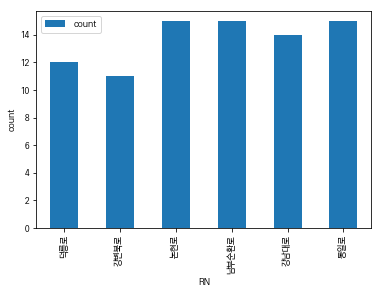

In [21]:
acc_plot = acc6.plot(acc6['RN'],kind = 'bar')
acc_plot.set_xlabel('RN')
acc_plot.set_ylabel('count')

In [22]:
acc_geometry = acc_geo['geometry'].values[:]
acc_geo =acc_geo.drop(['geometry'], axis=1)
crs = {'init': 'epsg:5179'}
cent_road = gp.read_file('seoul_road_5179.shp')

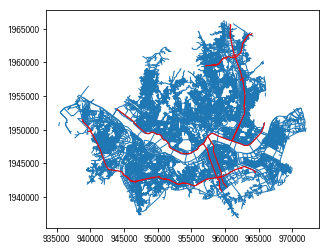

In [23]:
seoul=cent_road.plot(LineWidth=1)
acc_GDF = gp.GeoDataFrame(acc_geo, crs=crs, geometry=acc_geometry)
acc_GDF.plot(ax=seoul, LineWidth=1,color='r')

In [24]:
m=folium.Map(location=[37.566345,126.977893], zoom_start=11, tiles='Stamen Toner', crs="EPSG3857")
folium.GeoJson(acc_GDF).add_to(m)
m

#### 공간분석

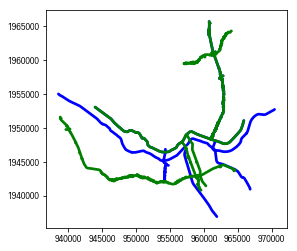

In [25]:
df1 = gcc.geometry.buffer(200)
df2 = acc_GDF.geometry.buffer(200)
ax = df1.plot(color='blue',alpha=1)
df2.plot(ax=ax, color='green', alpha=1)

In [26]:
df_1 = df1.to_frame()
df_2 = df2.to_frame()

In [27]:
df1_geometry = df_1[0].values[:]
df_1 =df_1.drop([0], axis=1)
crs = {'init': 'epsg:5179'}
df1_GDF = gp.GeoDataFrame(df_1, crs=crs, geometry=df1_geometry)

In [28]:
df2_geometry = df_2[0].values[:]
df_2 =df_2.drop([0], axis=1)
crs = {'init': 'epsg:5179'}
df2_GDF = gp.GeoDataFrame(df_2, crs=crs, geometry=df2_geometry)

In [29]:
df2_GDF

,geometry
0,"POLYGON ((944222.5989652715 1953116.191398239,..."
1,"POLYGON ((957154.2295589981 1948946.390215192,..."
2,"POLYGON ((950970.4243426755 1948686.442082324,..."
3,"POLYGON ((961119.5930774253 1948511.012319753,..."
4,"POLYGON ((958699.9143611036 1959614.631709432,..."
5,"POLYGON ((957162.9436205305 1959508.850799894,..."
6,"POLYGON ((958350.2586199344 1959686.395498727,..."
7,"POLYGON ((958567.7723371449 1959646.952256256,..."
8,"POLYGON ((958081.0028758204 1959597.856933757,..."
9,"POLYGON ((958473.0079315873 1959595.967138521,..."


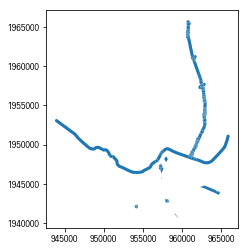

In [30]:
res_intersection = gp.overlay(df1_GDF,df2_GDF, how='intersection')
res_intersection.plot()

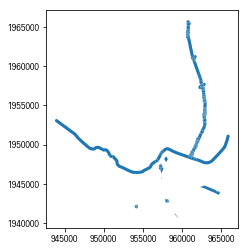

In [31]:
f_road_df = res_intersection
f_road = res_intersection['geometry'].values[:]
crs = {'init': 'epsg:5179'}
f_road_gp = gp.GeoDataFrame(f_road_df, crs=crs, geometry=f_road)
f_road_gp.plot()

In [32]:
m3=folium.Map(location=[37.566345,126.977893], zoom_start=11, tiles='Stamen Toner', crs="EPSG3857")
folium.GeoJson(f_road_gp).add_to(m3)
m3